Here we are downloading some libraries to work with 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df_weekends = pd.read_csv('london_weekends.csv')

In [3]:
df_weekends.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,1,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570
1,1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,1,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210
2,2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,1,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802
3,3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,1,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108
4,4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,0,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399


In [4]:
df_weekends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5379 non-null   int64  
 1   realSum                     5379 non-null   float64
 2   room_type                   5379 non-null   object 
 3   room_shared                 5379 non-null   bool   
 4   room_private                5379 non-null   bool   
 5   person_capacity             5379 non-null   float64
 6   host_is_superhost           5379 non-null   bool   
 7   multi                       5379 non-null   int64  
 8   biz                         5379 non-null   int64  
 9   cleanliness_rating          5379 non-null   float64
 10  guest_satisfaction_overall  5379 non-null   float64
 11  bedrooms                    5379 non-null   int64  
 12  dist                        5379 non-null   float64
 13  metro_dist                  5379 

In [5]:
df_weekends = df_weekends.drop(['Unnamed: 0', 'room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 
              'lng', 'lat'], axis=1)

In [6]:
df_weekends.head()

,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,121.122322,Private room,2.0,False,6.0,69.0,1,5.734117,0.437094
1,195.912416,Private room,2.0,False,10.0,96.0,1,4.788905,1.464050
2,193.325337,Private room,3.0,False,10.0,95.0,1,4.596677,0.450306
3,180.389943,Private room,2.0,False,9.0,87.0,1,2.054769,0.132670
4,405.700981,Entire home/apt,3.0,False,7.0,65.0,0,4.491277,0.354108


In [7]:
df_weekends = pd.get_dummies(df_weekends, columns=['room_type', 'host_is_superhost'])


In [8]:
df_weekends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     5379 non-null   float64
 1   person_capacity             5379 non-null   float64
 2   cleanliness_rating          5379 non-null   float64
 3   guest_satisfaction_overall  5379 non-null   float64
 4   bedrooms                    5379 non-null   int64  
 5   dist                        5379 non-null   float64
 6   metro_dist                  5379 non-null   float64
 7   room_type_Entire home/apt   5379 non-null   uint8  
 8   room_type_Private room      5379 non-null   uint8  
 9   room_type_Shared room       5379 non-null   uint8  
 10  host_is_superhost_False     5379 non-null   uint8  
 11  host_is_superhost_True      5379 non-null   uint8  
dtypes: float64(6), int64(1), uint8(5)
memory usage: 320.6 KB


                       Feature      F-test        p-value
0              person_capacity  931.125006  9.475162e-189
6    room_type_Entire home/apt  804.581835  4.617726e-165
7       room_type_Private room  781.067578  1.318125e-160
3                     bedrooms  665.609981  1.776851e-138
4                         dist  308.959941   2.720133e-67
5                   metro_dist  151.232513   2.684813e-34
8        room_type_Shared room    4.899851   2.690083e-02
9      host_is_superhost_False    4.104073   4.282932e-02
10      host_is_superhost_True    4.104073   4.282932e-02
1           cleanliness_rating    0.532967   4.653938e-01
2   guest_satisfaction_overall    0.145873   7.025260e-01


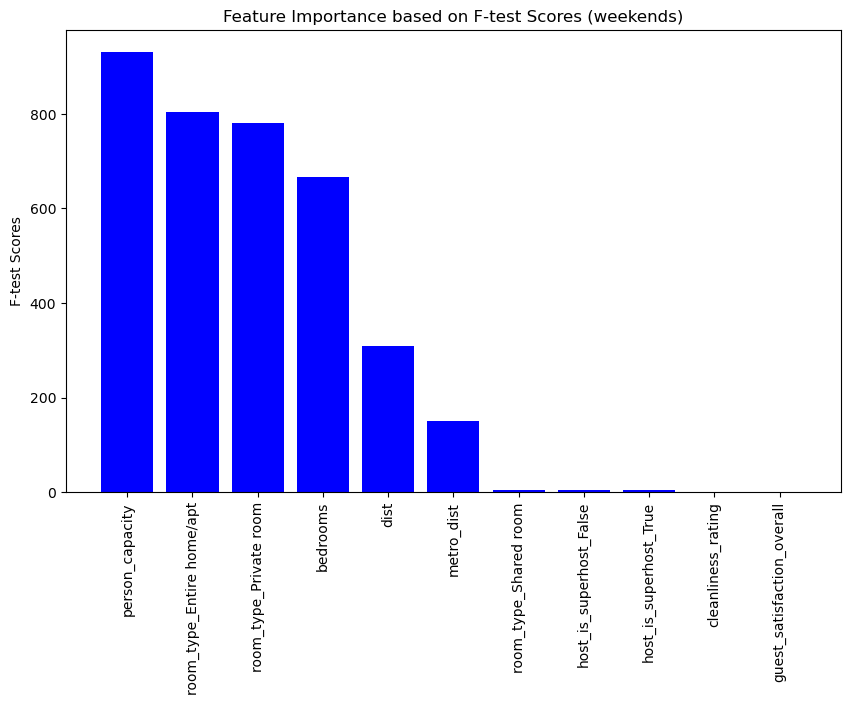

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.feature_selection import f_regression

# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract the features and the target variable
X = df_weekends.drop('realSum', axis=1)
y = df_weekends['realSum']

# Compute the F-test and the p-values for the features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-test scores, and p-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

# Sort the features based on F-test scores in descending order
feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

# Print the feature ranking
print(feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores (weekends)')
plt.xticks(rotation=90)
plt.show()


Linear Regression. 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame, and 'target_column' is the name of your target variable
# Define your feature matrix and target variable
X = df_weekends[['person_capacity','room_type_Entire home/apt', 'room_type_Private room', 'bedrooms', 'dist', 'metro_dist']] 
y = df_weekends['realSum']  # Replace 'target_column' with your actual target variable name



Mean Squared Error (test set): 0.04168089061274856
R-squared (test set): 0.9999701457341349


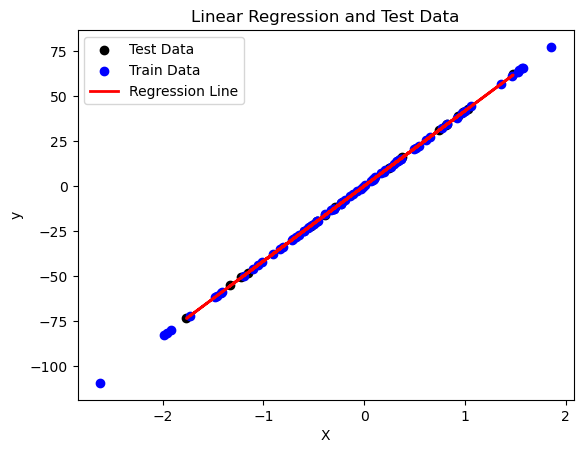

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate the evaluation metrics for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

# Calculate the mean of the cross-validated scores
mean_mse_score = np.mean(mse_scores)
mean_r2_score = np.mean(r2_scores)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Mean Squared Error (test set):", mse_test)
print("R-squared (test set):", r2_test)

# Plot the original data points
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Plot the regression line
y_regression_line = model.coef_ * X_test + model.intercept_
plt.plot(X_test, y_regression_line, color='red', linewidth=2, label='Regression Line')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression and Test Data')
plt.legend()
plt.show()


Mean Squared Error (test set): 0.041389210733755025
R-squared (test set): 0.9999723874139402


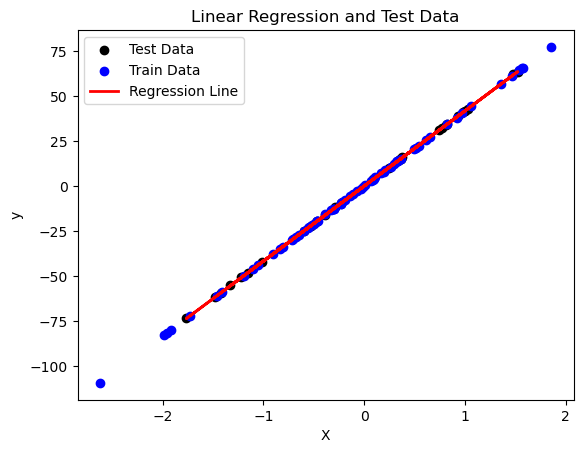

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=1, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    # Train the model on the training fold
    model.fit(X_train_kf, y_train_kf)

    # Predict on the validation fold
    y_pred_kf = model.predict(X_val_kf)

    # Calculate the evaluation metrics for the fold
    mse_scores.append(mean_squared_error(y_val_kf, y_pred_kf))
    r2_scores.append(r2_score(y_val_kf, y_pred_kf))

# Calculate the mean of the cross-validated scores
mean_mse_score = np.mean(mse_scores)
mean_r2_score = np.mean(r2_scores)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Calculate the evaluation metrics for the test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print("Mean Squared Error (test set):", mse_test)
print("R-squared (test set):", r2_test)

# Plot the original data points
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_train, y_train, color='blue', label='Train Data')

# Plot the regression line
y_regression_line = model.coef_ * X_test + model.intercept_
plt.plot(X_test, y_regression_line, color='red', linewidth=2, label='Regression Line')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression and Test Data')
plt.legend()
plt.show()


In [118]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the test set
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("Mean Absolute Percentage Error (MAPE) for the test set: {:.2f}%".format(mape_test))



Mean Absolute Percentage Error (MAPE) for the test set: 0.63%


Random Forest 

Mean Squared Error: 955.6429892560693
R-squared: 0.8997971318064844


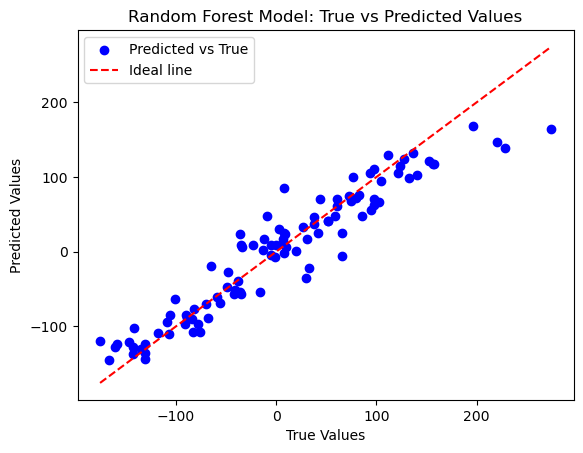

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Create a random forest regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error and R-squared for the predicted values
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the mean squared error and R-squared
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model: True vs Predicted Values')
plt.legend()
plt.show()


In [120]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 164.27%


GBM 

Mean Squared Error: 759.9216675404751


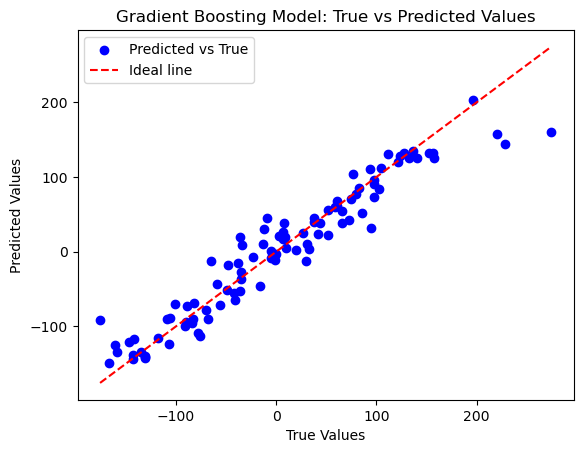

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Create a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Model: True vs Predicted Values')
plt.legend()
plt.show()


In [122]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 94.48%


KNN

Cross-validated MSE scores:  [1139.21595577 2355.94756862 1329.47619009 1076.46212987 1936.45624984]
Mean cross-validated MSE score:  1567.5116188382822
Mean Squared Error: 801.5759585245829


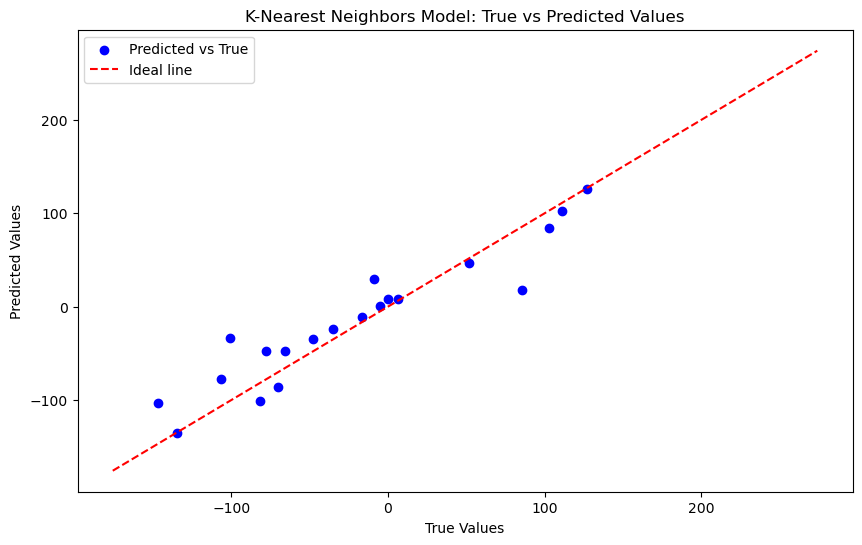

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=5)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mse_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Print the cross-validated MSE scores
print("Cross-validated MSE scores: ", cv_mse_scores)

# Calculate the mean of the cross-validated MSE scores
mean_cv_mse_score = np.mean(cv_mse_scores)

# Print the mean cross-validated MSE score
print("Mean cross-validated MSE score: ", mean_cv_mse_score)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Model: True vs Predicted Values')
plt.legend()
plt.show()


In [124]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    :param y_true: Array of true values.
    :param y_pred: Array of predicted values.
    :return: MAPE value.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the test set
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 448.34%


XGboost 

Mean Squared Error: 1174.8396586577132


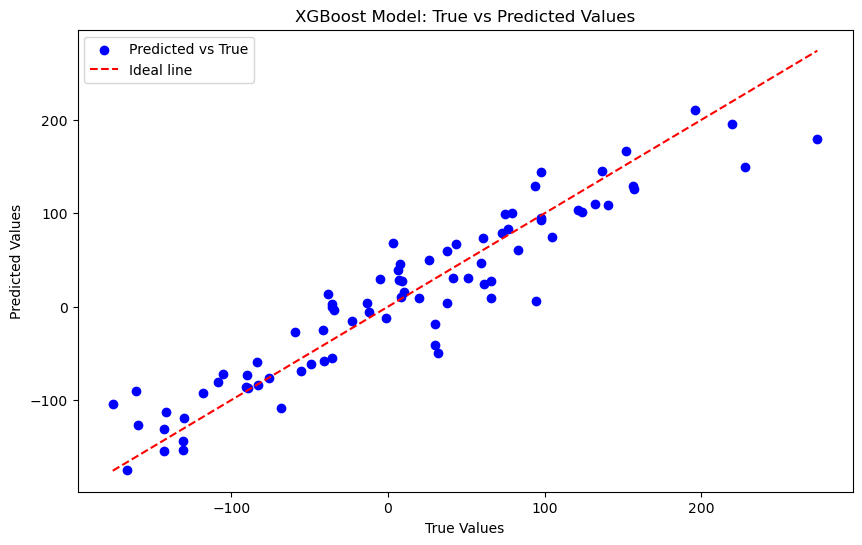

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Generate some random data for demonstration
X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor
model = XGBRegressor()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

# Calculate the mean squared error for the predicted values
mse = mean_squared_error(y_train, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Model: True vs Predicted Values')
plt.legend()
plt.show()


In [126]:
# Perform k-fold cross-validation and get the predicted values
y_pred_list = []
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_val_kf = y_train[train_index], y_train[test_index]

    model.fit(X_train_kf, y_train_kf)
    y_pred_kf = model.predict(X_val_kf)
    y_pred_list.extend(y_pred_kf)

y_pred = np.array(y_pred_list)

# Calculate MAPE for the predicted values
mape = mean_absolute_percentage_error(y_train, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 394.76%


In [137]:
df_weekdays = pd.read_csv('london_weekdays.csv')

In [138]:
df_weekdays.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [139]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

In [141]:
df_weekdays = df_weekdays.drop(['Unnamed: 0', 'room_shared', 'room_private', 'multi', 
             'biz', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 
              'lng', 'lat'], axis=1)


In [142]:
df_weekdays.head()

,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,570.098074,Entire home/apt,2.0,False,10.0,98.0,1,5.301018,1.588990
1,297.984430,Private room,2.0,True,10.0,99.0,1,2.198946,0.379262
2,336.790611,Private room,2.0,False,10.0,96.0,1,2.322958,0.453178
3,226.722171,Private room,2.0,True,10.0,99.0,1,5.707825,1.723977
4,256.355982,Private room,3.0,False,9.0,98.0,1,3.257945,0.825417


In [143]:
df_weekdays['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [145]:
df_weekdays = pd.get_dummies(df_weekdays, columns=['room_type', 'host_is_superhost'])



In [146]:
df_weekdays

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_False,host_is_superhost_True
0,570.098074,2.0,10.0,98.0,1,5.301018,1.588990,1,0,0,1,0
1,297.984430,2.0,10.0,99.0,1,2.198946,0.379262,0,1,0,0,1
2,336.790611,2.0,10.0,96.0,1,2.322958,0.453178,0,1,0,1,0
3,226.722171,2.0,10.0,99.0,1,5.707825,1.723977,0,1,0,0,1
4,256.355982,3.0,9.0,98.0,1,3.257945,0.825417,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4609,310.449446,2.0,10.0,100.0,1,6.347654,0.445862,0,1,0,1,0
4610,265.057974,4.0,8.0,84.0,1,5.231706,0.463949,1,0,0,1,0
4611,142.289329,2.0,10.0,97.0,1,8.867238,2.675007,0,1,0,1,0
4612,372.304146,2.0,8.0,80.0,1,7.576798,1.682697,0,1,0,1,0


In [147]:
df_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     4614 non-null   float64
 1   person_capacity             4614 non-null   float64
 2   cleanliness_rating          4614 non-null   float64
 3   guest_satisfaction_overall  4614 non-null   float64
 4   bedrooms                    4614 non-null   int64  
 5   dist                        4614 non-null   float64
 6   metro_dist                  4614 non-null   float64
 7   room_type_Entire home/apt   4614 non-null   uint8  
 8   room_type_Private room      4614 non-null   uint8  
 9   room_type_Shared room       4614 non-null   uint8  
 10  host_is_superhost_False     4614 non-null   uint8  
 11  host_is_superhost_True      4614 non-null   uint8  
dtypes: float64(6), int64(1), uint8(5)
memory usage: 275.0 KB


                       Feature      F-test        p-value
6    room_type_Entire home/apt  543.429027  1.008795e-113
0              person_capacity  534.988675  4.444089e-112
7       room_type_Private room  528.536053  8.062167e-111
3                     bedrooms  435.310255   1.877026e-92
4                         dist  198.338066   3.908279e-44
5                   metro_dist   88.618971   7.356956e-21
8        room_type_Shared room    2.867082   9.047619e-02
1           cleanliness_rating    1.711440   1.908639e-01
2   guest_satisfaction_overall    0.742482   3.889117e-01
10      host_is_superhost_True    0.001560   9.684997e-01
9      host_is_superhost_False    0.001560   9.684997e-01


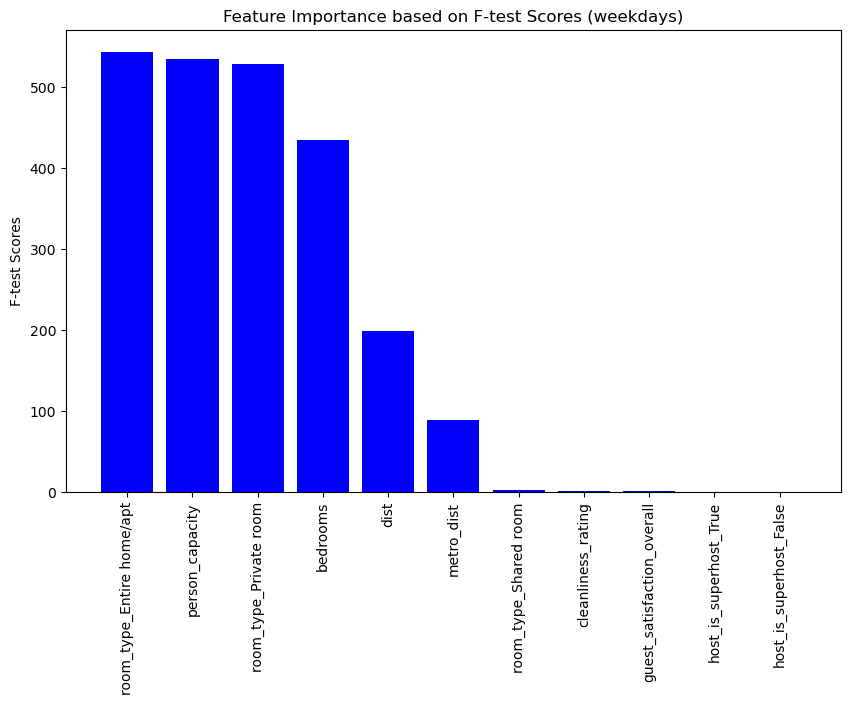

In [155]:
# Assuming your data is stored in a pandas DataFrame named 'data'
# Extract the features and the target variable
X = df_weekdays.drop('realSum', axis=1)
y = df_weekdays['realSum']

# Compute the F-test and the p-values for the features
f_values, p_values = f_regression(X, y)

# Create a DataFrame to store feature names, F-test scores, and p-values
feature_importance = pd.DataFrame({'Feature': X.columns, 'F-test': f_values, 'p-value': p_values})

# Sort the features based on F-test scores in descending order
feature_importance.sort_values(by='F-test', ascending=False, inplace=True)

# Print the feature ranking
print(feature_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['F-test'], color='b', align='center')
plt.xlabel('')
plt.ylabel('F-test Scores')
plt.title('Feature Importance based on F-test Scores (weekdays)')
plt.xticks(rotation=90)
plt.show()


In [70]:
df_weekdays = df_weekdays.drop(['guest_satisfaction_overall', 'host_is_superhost_True', 'host_is_superhost_False'], axis=1)

In [149]:
df_weekdays.head()

,realSum,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,host_is_superhost_False,host_is_superhost_True
0,570.098074,2.0,10.0,98.0,1,5.301018,1.588990,1,0,0,1,0
1,297.984430,2.0,10.0,99.0,1,2.198946,0.379262,0,1,0,0,1
2,336.790611,2.0,10.0,96.0,1,2.322958,0.453178,0,1,0,1,0
3,226.722171,2.0,10.0,99.0,1,5.707825,1.723977,0,1,0,0,1
4,256.355982,3.0,9.0,98.0,1,3.257945,0.825417,0,1,0,1,0


Linear Regression 

In [151]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame, and 'target_column' is the name of your target variable
# Define your feature matrix and target variable
X = df_weekdays[['person_capacity','cleanliness_rating','bedrooms', 'dist', 'metro_dist', 'room_type_Entire home/apt', 
         'room_type_Private room', 'room_type_Shared room']] 
y = df_weekdays['realSum']  # Replace 'target_column' with your actual target variable name


Mean Absolute Percentage Error (MAPE): 1.48%


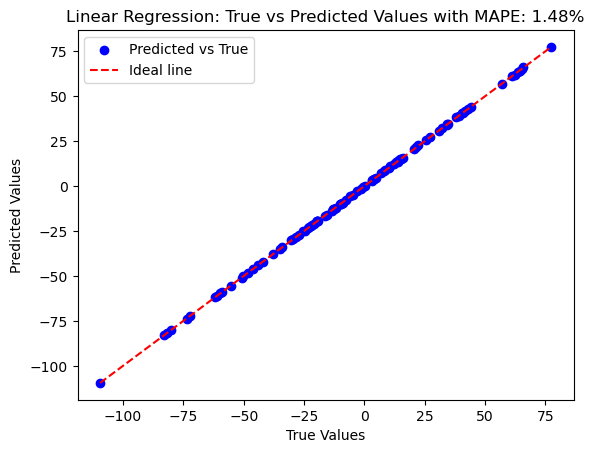

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Assume X and y are your feature matrix and target variable, respectively

# Create an instance of the Linear Regression model
model = LinearRegression()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calculate the Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: True vs Predicted Values with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()


Random Forest 

Mean Absolute Percentage Error (MAPE): 0.11%


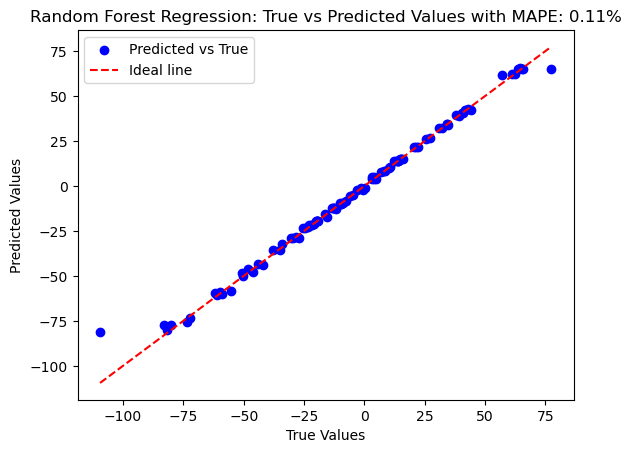

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assume X and y are your feature matrix and target variable, respectively

# Create an instance of the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Compute MAPE
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: True vs Predicted Values with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()


Gradient Boost Regressor 

Mean Absolute Percentage Error (MAPE): 0.12%


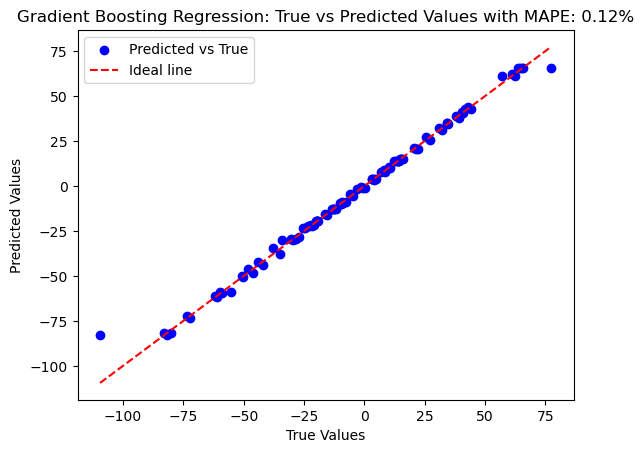

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assume X and y are your feature matrix and target variable, respectively

# Create an instance of the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)


# Compute MAPE
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting Regression: True vs Predicted Values with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()


KNN 

Cross-validated MAPE scores:  [0.04049301 0.05603323 0.10373124 0.07448782 0.1738061 ]
Mean cross-validated MAPE score:  0.08971027948566948


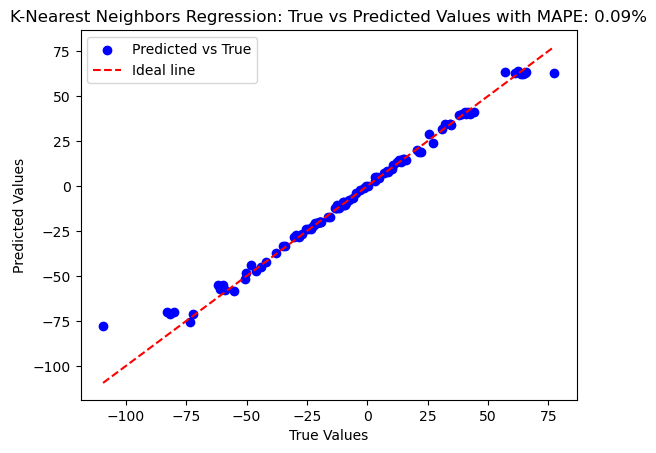

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assume X and y are your feature matrix and target variable, respectively

# Create an instance of the K-Nearest Neighbors Regressor model
model = KNeighborsRegressor(n_neighbors=5)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_mape_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Calculate the mean of the cross-validated MAPE scores
mean_cv_mape_score = np.mean(cv_mape_scores)

# Print the cross-validated MAPE scores
print("Cross-validated MAPE scores: ", cv_mape_scores)

# Print the mean cross-validated MAPE score
print("Mean cross-validated MAPE score: ", mean_cv_mape_score)

# Get the predicted values using cross-validation
y_pred = cross_val_predict(model, X, y, cv=kf)

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('K-Nearest Neighbors Regression: True vs Predicted Values with MAPE: {:.2f}%'.format(mean_cv_mape_score))
plt.legend()
plt.show()


XGBRegressor 

Mean Absolute Percentage Error (MAPE): 0.18%


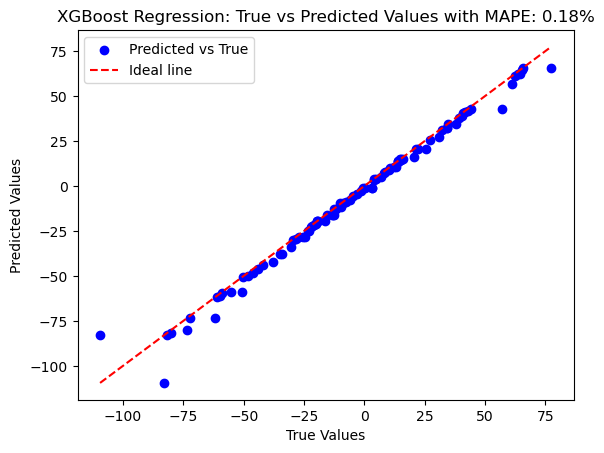

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_predict
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Assume X and y are your feature matrix and target variable, respectively

# Create an instance of the XGBoost Regressor model
model = XGBRegressor()

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation and get the predicted values
y_pred = cross_val_predict(model, X, y, cv=kf)

# Compute MAPE
mape = mean_absolute_percentage_error(y, y_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

# Plot the results
plt.scatter(y, y_pred, color='b', label='Predicted vs True')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--', label='Ideal line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regression: True vs Predicted Values with MAPE: {:.2f}%'.format(mape))
plt.legend()
plt.show()


In [1]:
#BARBARA